#어차피 몇 년 없어서 데이터들 딕셔너리로 안 묶고 할게요 직관적이기도하고

In [ ]:
# 모듈, 라이브러리
import pandas as pd
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.flush_and_unmount()

# 데이터 데이터프레임에 저장

In [ ]:
df21 = pd.read_csv('train_subway21.csv', encoding='cp949')
df22 = pd.read_csv('train_subway22.csv', encoding='cp949')
df23 = pd.read_csv('train_subway23.csv', encoding='cp949')

# 크기 확인

In [ ]:
print(df21.shape)
print(df22.shape)
print(df23.shape)

(5493089, 16)
(5396200, 16)
(5520981, 16)


In [ ]:
# 컬럼 확인

In [ ]:
print(df21.columns)
print(df22.columns)
print(df23.columns)

Index(['Unnamed: 0', 'train_subway21.tm', 'train_subway21.line',
       'train_subway21.station_number', 'train_subway21.station_name',
       'train_subway21.direction', 'train_subway21.stn', 'train_subway21.ta',
       'train_subway21.wd', 'train_subway21.ws', 'train_subway21.rn_day',
       'train_subway21.rn_hr1', 'train_subway21.hm', 'train_subway21.si',
       'train_subway21.ta_chi', 'train_subway21.congestion'],
      dtype='object')
Index(['Unnamed: 0', 'train_subway22.tm', 'train_subway22.line',
       'train_subway22.station_number', 'train_subway22.station_name',
       'train_subway22.direction', 'train_subway22.stn', 'train_subway22.ta',
       'train_subway22.wd', 'train_subway22.ws', 'train_subway22.rn_day',
       'train_subway22.rn_hr1', 'train_subway22.hm', 'train_subway22.si',
       'train_subway22.ta_chi', 'train_subway22.congestion'],
      dtype='object')
Index(['Unnamed: 0', 'train_subway23.tm', 'train_subway23.line',
       'train_subway23.station_number', 'tr

# unnamed는 인덱스라 삭제해야함
| Index | Column Name               |
|-------|---------------------------|
| 0     | Unnamed: 0     (인덱스)           |
| 1     | train_subway**.tm     (시간)    |
| 2     | train_subway**.line       (호선)|
| 3     | train_subway**.station_number(역번호)|
| 4     | train_subway**.station_name(역명)|
| 5     | train_subway**.direction  (상하구분, 상행 하행 구분??)|
| 6     | train_subway**.stn        (AWS 지점 코드)|
| 7     | train_subway**.ta         (정시 기온?)|
| 8     | train_subway**.wd         (정시 10분 평균 풍향 degree)|
| 9     | train_subway**.ws         (정시 10분 평균 풍속 m/s )|
| 10    | train_subway**.rn_day    (일강수량 0~24시 까지의 일 강수량 mm) |
| 11    | train_subway**.rn_hr1     (1시간 강수량 mm)|
| 12    | train_subway**.hm         (정시 상대 습도 %)|
| 13    | train_subway**.si         (ASOS 일사량 MJ/m^2)|
| 14    | train_subway**.ta_chi     (500m 객관 분석 자료 도C)|
| 15    | train_subway**.congestion (열차 내 혼잡도 %)|

In [ ]:
df21.drop(columns=['Unnamed: 0'], inplace=True)
df22.drop(columns=['Unnamed: 0'], inplace=True)
df23.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
###할까말까
'''df.columns = [
    'datetime', 'line', 'station_number', 'station_name', 'direction',
    'temp', 'temp_alt', 'wind_dir', 'wind_speed',
    'rain_day', 'rain_hourly', 'humidity', 'solar', 'temp_feel', 'congestion'
]
'''

In [ ]:
df21['train_subway21.tm'] = pd.to_datetime(df21['train_subway21.tm'])
df22['train_subway21.tm'] = pd.to_datetime(df22['train_subway22.tm'])
df23['train_subway21.tm'] = pd.to_datetime(df23['train_subway23.tm'])

#결측치 확인

In [ ]:
print(df21.isnull().sum())
print(df22.isnull().sum())
print(df23.isnull().sum())

Unnamed: 0                       1
train_subway21.tm                0
train_subway21.line              0
train_subway21.station_number    0
train_subway21.station_name      0
train_subway21.direction         0
train_subway21.stn               0
train_subway21.ta                0
train_subway21.wd                0
train_subway21.ws                0
train_subway21.rn_day            0
train_subway21.rn_hr1            1
train_subway21.hm                1
train_subway21.si                1
train_subway21.ta_chi            1
train_subway21.congestion        1
dtype: int64
Unnamed: 0                       0
train_subway22.tm                0
train_subway22.line              0
train_subway22.station_number    0
train_subway22.station_name      0
train_subway22.direction         0
train_subway22.stn               0
train_subway22.ta                0
train_subway22.wd                0
train_subway22.ws                0
train_subway22.rn_day            0
train_subway22.rn_hr1            0
train_s

In [ ]:
# 결측치가 하나라도 있는 행 추출
rows_with_na = df21[df21.isnull().any(axis=1)]

# 출력
print("결측치가 포함된 행:")
print(rows_with_na)


결측치가 포함된 행:
         Unnamed: 0  train_subway21.tm  train_subway21.line  \
5452143         NaN                572                 17.7   

         train_subway21.station_number train_subway21.station_name  \
5452143                              0                           0   

        train_subway21.direction  train_subway21.stn  train_subway21.ta  \
5452143                        0                   0               84.8   

         train_subway21.wd  train_subway21.ws  train_subway21.rn_day  \
5452143               0.08               19.0                    4.0   

         train_subway21.rn_hr1  train_subway21.hm  train_subway21.si  \
5452143                    NaN                NaN                NaN   

         train_subway21.ta_chi  train_subway21.congestion  
5452143                    NaN                        NaN  


In [ ]:
df21_clean = df21[~(df21.isnull().any(axis=1) | (df21 == -99).any(axis=1))]
df22_clean = df22[~(df22.isnull().any(axis=1) | (df22 == -99).any(axis=1))]
df23_clean = df23[~(df23.isnull().any(axis=1) | (df23 == -99).any(axis=1))]

In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [ ]:
pd.reset_option('display.float_format')


In [ ]:
# 전체 중복 행 수
print("중복된 행 수:", df21_clean.duplicated().sum())
print("중복된 행 수:", df22_clean.duplicated().sum())
print("중복된 행 수:", df23_clean.duplicated().sum())

중복된 행 수: 7779


In [ ]:
df21_clean.drop_duplicates(inplace=True)
df22_clean.drop_duplicates(inplace=True)
df23_clean.drop_duplicates(inplace=True)

<ipython-input-45-73776903be90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22_clean.drop_duplicates(inplace=True)
<ipython-input-45-73776903be90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df23_clean.drop_duplicates(inplace=True)


다음에 할거 시간 변수 나누기
요일
월 주말여부 등등


상선하선 숫자형으로 바꾸기~
df = pd.get_dummies(df, columns=['train_subway23.direction'])
이렇게하면될듯

In [54]:
# === 이상치 처리할 지정된 7개 칼럼 ===
columns_for_IQR = [
    'train_subway23.ws',         # 풍속
    'train_subway23.rn_day',     # 일 강수량
    'train_subway23.rn_hr1',     # 1시간 강수량
    'train_subway23.hm',         # 상대 습도
    'train_subway23.si',         # 일사량
    'train_subway23.ta_chi',     # 체감온도
    'train_subway23.congestion'  # 혼잡도
]

In [51]:
# === 이상치 제거 함수 정의 ===
def remove_outliers(df, col):
    # IQR 계산
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # 이상치 제외하고 반환
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [55]:
for col in columns_for_IQR:
    if col in df21_clean.columns:
        df21_iqr_cleaned = remove_outliers(df21_clean, col)

for col in columns_for_IQR:
    if col in df22_clean.columns:
        df21_iqr_cleaned = remove_outliers(df22_clean, col)

for col in columns_for_IQR:
    if col in df21_clean.columns:
        df21_iqr_cleaned = remove_outliers(df21_clean, col)

for col in columns_for_IQR:
    if col in df23_clean.columns:
        df21_iqr_cleaned = remove_outliers(df23_clean, col)

스케일링도해야됨

In [56]:
df21_clean.describe()

,Unnamed: 0,train_subway21.tm,train_subway21.line,train_subway21.station_number,train_subway21.stn,train_subway21.ta,train_subway21.wd,train_subway21.ws,train_subway21.rn_day,train_subway21.rn_hr1,train_subway21.hm,train_subway21.si,train_subway21.ta_chi,train_subway21.congestion
count,3005312.000,3005312.000,3005312.000,3005312.000,3005312.000,3005312.000,3005312.000,3005312.000,3005312.000,3005312.000,3005312.000,3005312.000,3005312.000,3005312.000
mean,2748101.290,2021069489.043,4.116,1756.665,426.805,16.224,179.393,1.836,1.502,0.140,60.940,1.043,16.510,21.789
std,1599770.202,32595.620,2.269,1173.656,150.347,10.395,99.673,1.217,5.872,0.988,21.106,0.958,11.311,17.846
min,4260.000,2021010100.000,1.000,150.000,98.000,-25.200,-9.900,0.000,0.000,0.000,1.100,0.000,-25.100,0.000
25%,1303137.250,2021042115.000,2.000,414.000,406.000,9.000,93.800,1.000,0.000,0.000,44.900,0.190,8.600,10.000
50%,2749014.500,2021071417.000,4.000,1911.000,413.000,17.700,182.400,1.600,0.000,0.000,59.700,0.750,18.100,19.000
75%,4208360.250,2021100107.000,6.000,2640.000,434.000,24.500,265.000,2.400,0.000,0.000,77.100,1.750,25.800,28.000
max,5452138.000,2021123118.000,8.000,9006.000,889.000,39.600,360.000,12.600,85.000,64.700,100.000,3.740,37.500,230.000


In [ ]:
df22_clean.describe()

,Unnamed: 0,train_subway22.tm,train_subway22.line,train_subway22.station_number,train_subway22.stn,train_subway22.ta,train_subway22.wd,train_subway22.ws,train_subway22.rn_day,train_subway22.rn_hr1,train_subway22.hm,train_subway22.si,train_subway22.ta_chi,train_subway22.congestion
count,3302136.000,3302136.000,3302136.000,3302136.000,3302136.000,3302136.000,3302136.000,3302136.000,3302136.000,3302136.000,3302136.000,3302136.000,3302136.000,3302136.000
mean,2705430.626,2022066270.135,4.169,1750.152,429.710,15.873,191.272,1.888,2.475,0.195,58.380,1.116,16.184,25.148
std,1559094.768,32246.406,2.213,1207.207,139.593,10.760,97.777,1.237,11.401,1.593,21.144,0.992,11.723,19.515
min,6.000,2022010108.000,1.000,150.000,98.000,-18.800,-9.900,0.000,0.000,0.000,2.500,0.000,-22.000,0.000
25%,1356419.750,2022041406.000,2.000,410.000,407.000,8.300,110.900,1.000,0.000,0.000,41.700,0.240,7.700,12.000
50%,2705061.500,2022063006.000,4.000,1911.000,419.000,18.000,205.300,1.700,0.000,0.000,57.100,0.850,18.300,22.000
75%,4058496.250,2022091709.000,6.000,2637.000,434.000,24.600,273.000,2.500,0.000,0.000,74.600,1.850,26.000,33.000
max,5396195.000,2022123118.000,8.000,9006.000,889.000,36.900,360.000,12.600,245.500,84.500,100.000,3.770,36.600,289.000


In [ ]:
df23_clean.describe()

,Unnamed: 0,train_subway23.tm,train_subway23.line,train_subway23.station_number,train_subway23.stn,train_subway23.ta,train_subway23.wd,train_subway23.ws,train_subway23.rn_day,train_subway23.rn_hr1,train_subway23.hm,train_subway23.si,train_subway23.ta_chi,train_subway23.congestion
count,3338498.000,3338498.000,3338498.000,3338498.000,3338498.000,3338498.000,3338498.000,3338498.000,3338498.000,3338498.000,3338498.000,3338498.000,3338498.000,3338498.000
mean,2754527.256,2023065571.243,4.105,1729.355,428.097,16.148,187.106,1.793,2.424,0.206,60.357,1.087,16.513,30.684
std,1598137.802,32699.304,2.204,1213.697,141.866,10.605,99.197,1.200,9.002,1.411,22.399,0.977,11.518,21.618
min,6.000,2023010108.000,1.000,150.000,98.000,-20.900,-9.900,0.000,0.000,0.000,4.400,0.000,-25.200,0.000
25%,1360038.250,2023040815.000,2.000,408.000,407.000,7.700,104.600,0.900,0.000,0.000,43.100,0.210,7.200,16.000
50%,2744832.500,2023062513.000,4.000,1907.000,418.000,18.400,200.900,1.600,0.000,0.000,59.800,0.800,18.800,27.000
75%,4149970.750,2023091714.000,6.000,2633.000,434.000,24.600,270.100,2.400,0.000,0.000,78.000,1.820,26.200,39.000
max,5520976.000,2023123118.000,8.000,9006.000,889.000,38.200,360.000,12.800,118.500,76.500,100.000,3.700,37.000,231.000


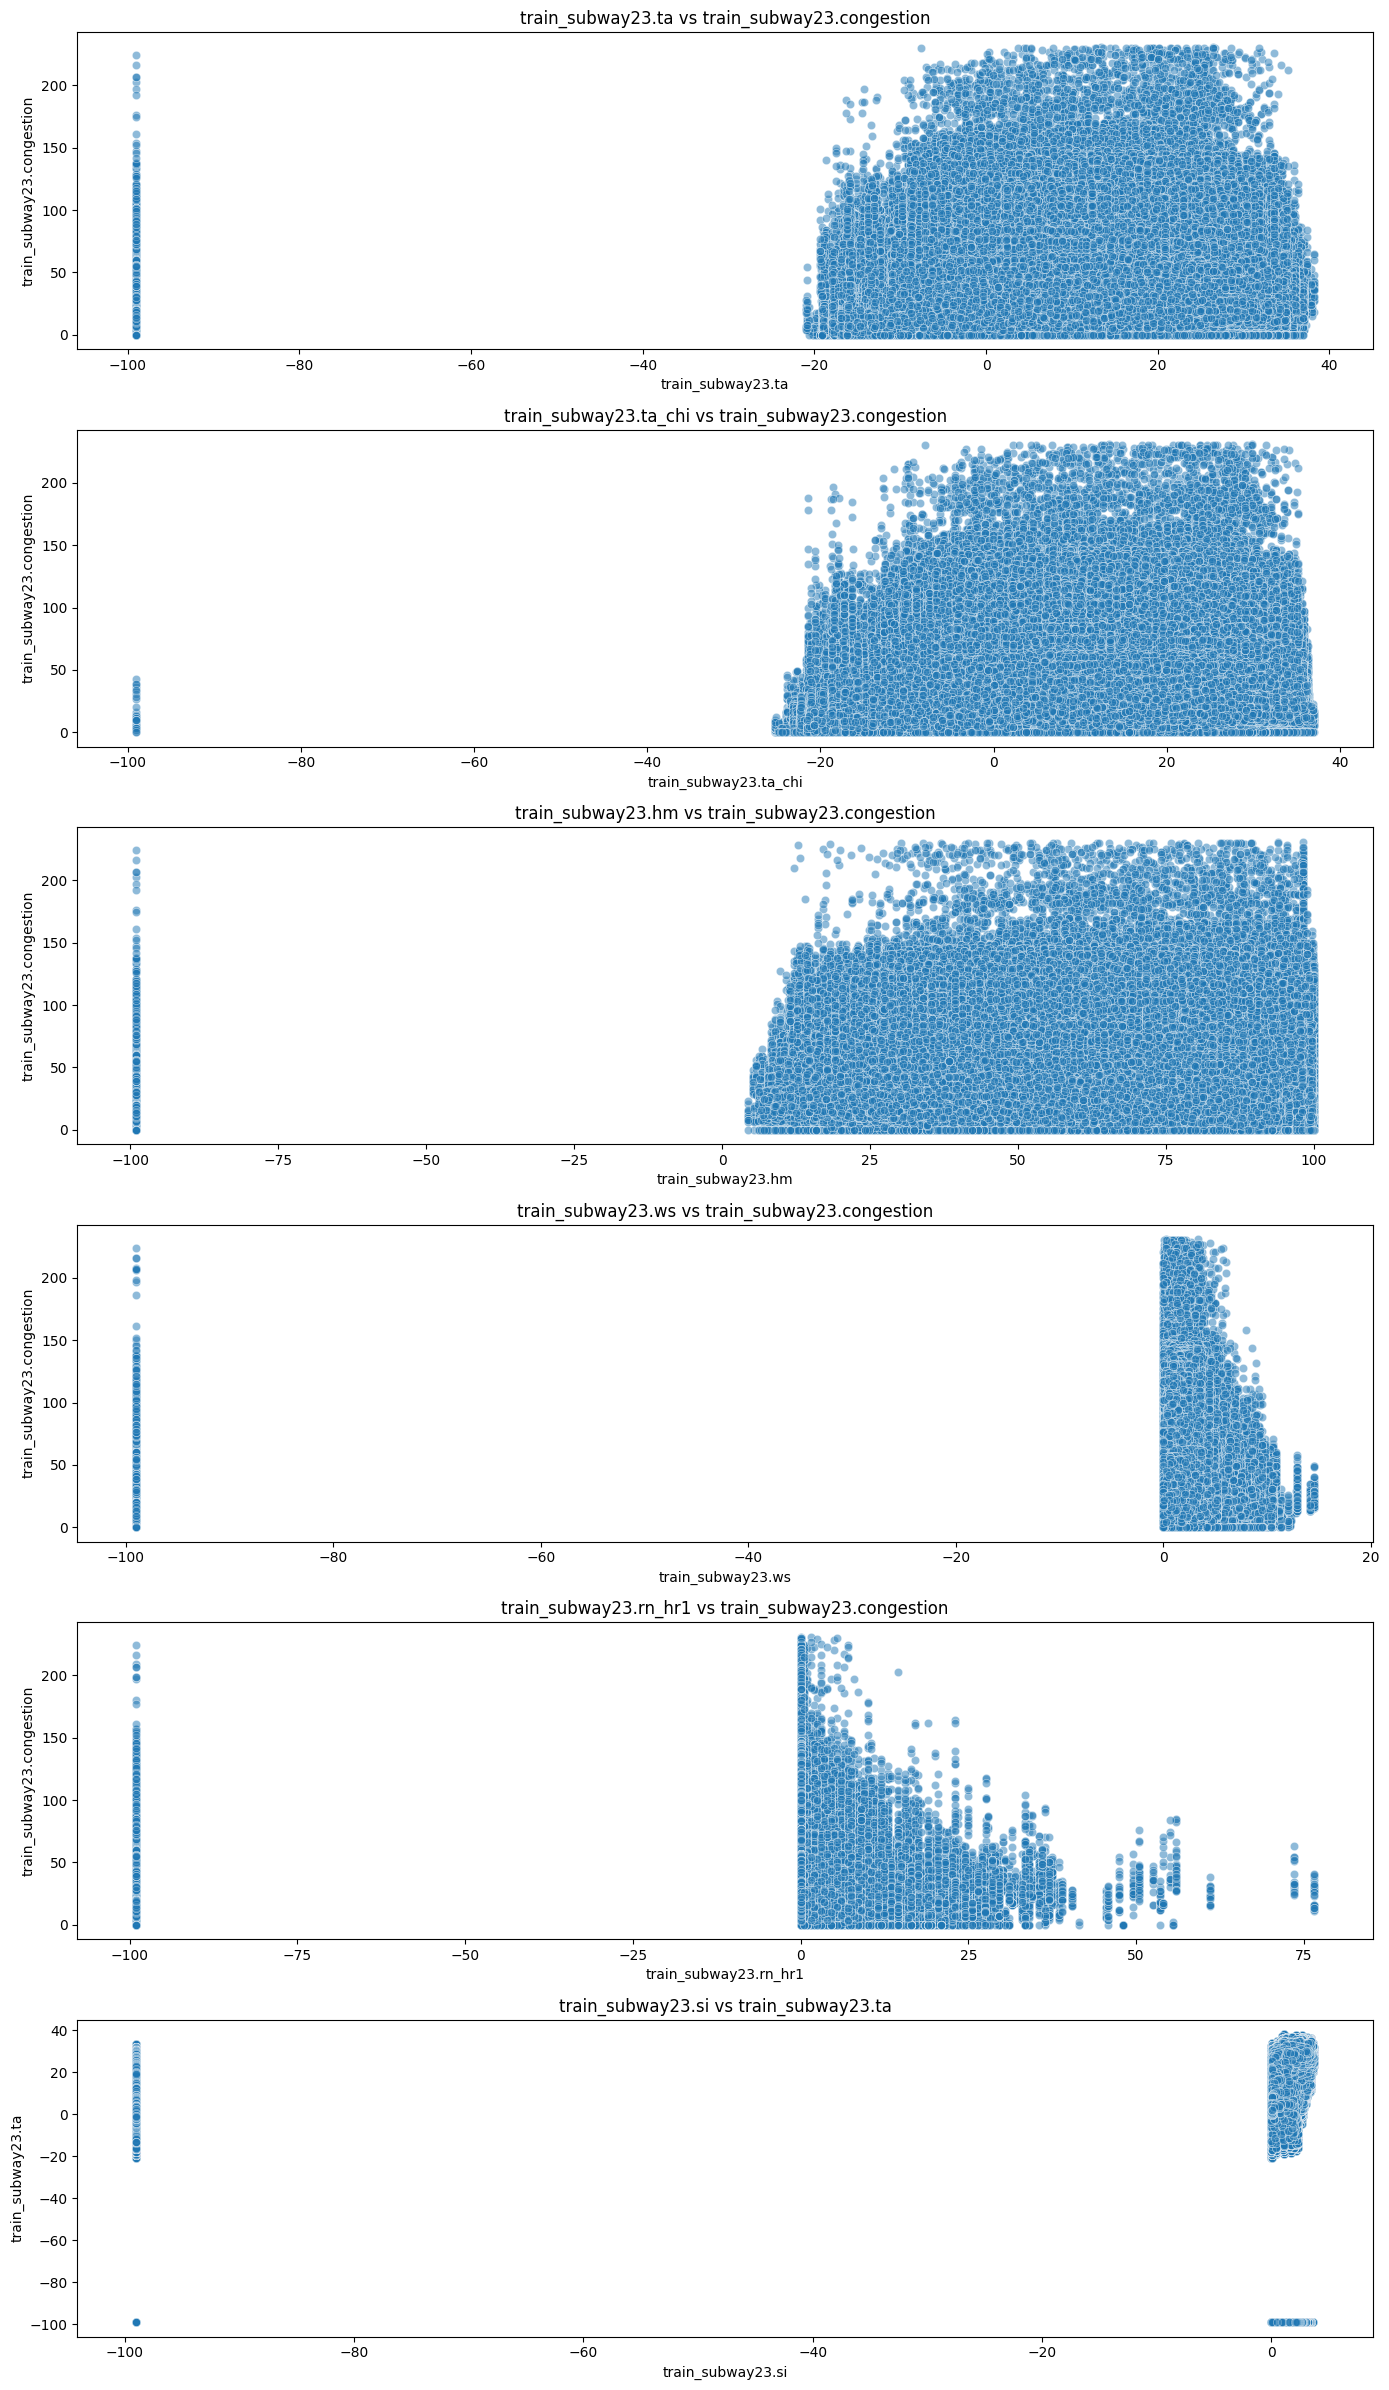

In [57]:
plot_pairs = [
    ('train_subway23.ta', 'train_subway23.congestion'),       # 기온 vs 혼잡도
    ('train_subway23.ta_chi', 'train_subway23.congestion'),   # 체감온도 vs 혼잡도
    ('train_subway23.hm', 'train_subway23.congestion'),       # 습도 vs 혼잡도
    ('train_subway23.ws', 'train_subway23.congestion'),       # 풍속 vs 혼잡도
    ('train_subway23.rn_hr1', 'train_subway23.congestion'),   # 1시간 강수량 vs 혼잡도
    ('train_subway23.si', 'train_subway23.ta'),               # 일사량 vs 기온
]

# 산점도 시각화
plt.figure(figsize=(14, len(plot_pairs)*4))
for i, (x, y) in enumerate(plot_pairs):
    if x in df.columns and y in df.columns:
        plt.subplot(len(plot_pairs), 1, i+1)
        sns.scatterplot(data=df, x=x, y=y, alpha=0.5)
        plt.title(f"{x} vs {y}")
        plt.xlabel(x)
        plt.ylabel(y)

plt.tight_layout()
plt.show()